<a href="https://colab.research.google.com/github/Priyankaverma2024/Project-4-Based-on-Mobile-phone-price-prediction/blob/main/Mobile_Price_Prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Mounted at /content/drive


# IMPORT IMPORTANT LIBRARIES  FOR  CREATING A MODEL AND PREDICT ABOUT THE DATASET

In [ ]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#  First we load given dataset of Mobile_Price.

In [ ]:
# Using Padas we can read this Dataset.

df=pd.read_excel("/content/drive/MyDrive/Processed_Flipdata.xlsx")
df

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999
...,...,...,...,...,...,...,...,...,...,...,...,...
536,637,SAMSUNG Galaxy S23 5G,Cream,256,8,3900,50MP,12MP,0,15.49,Qualcomm Snapdragon 8 Gen 2,79999
537,638,LAVA Z21,Cyan,32,2,3100,5MP,2MP,0,12.70,Octa Core,5998
538,639,Tecno Spark 8T,Turquoise Cyan,64,4,5000,50MP,8MP,0,16.76,MediaTek Helio G35,9990
539,641,SAMSUNG Galaxy A54 5G,Awesome Lime,128,8,5000,50MP,32MP,0,16.26,"Exynos 1380, Octa Core",38999


In [ ]:
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Prize
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999




Data  exploration and Preprocessing

In [ ]:
# shape of the dataset.
df.shape

(541, 12)

In [ ]:
# Featuers of the dataset.
df.columns

Index(['Unnamed: 0', 'Model', 'Colour', 'Memory', 'RAM', 'Battery_',
       'Rear Camera', 'Front Camera', 'AI Lens', 'Mobile Height', 'Processor_',
       'Prize'],
      dtype='object')

In [ ]:
df.index

RangeIndex(start=0, stop=541, step=1)

In [ ]:
#  Types of dataset .
df.dtypes

,0
Unnamed: 0,int64
Model,object
Colour,object
Memory,int64
RAM,int64
Battery_,int64
Rear Camera,object
Front Camera,object
AI Lens,int64
Mobile Height,float64


In [ ]:
# TO Check null values in Dataset.
df.isnull().sum()

,0
Unnamed: 0,0
Model,0
Colour,0
Memory,0
RAM,0
Battery_,0
Rear Camera,0
Front Camera,0
AI Lens,0
Mobile Height,0


In [ ]:
# Information about the dataset.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541 entries, 0 to 540
Data columns (total 12 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Unnamed: 0     541 non-null    int64  
 1   Model          541 non-null    object 
 2   Colour         541 non-null    object 
 3   Memory         541 non-null    int64  
 4   RAM            541 non-null    int64  
 5   Battery_       541 non-null    int64  
 6   Rear Camera    541 non-null    object 
 7   Front Camera   541 non-null    object 
 8   AI Lens        541 non-null    int64  
 9   Mobile Height  541 non-null    float64
 10  Processor_     541 non-null    object 
 11  Prize          541 non-null    int64  
dtypes: float64(1), int64(6), object(5)
memory usage: 50.8+ KB


In [ ]:
# No null values are present in our Dataset.

In [ ]:
# Number of unique values are present in our dataset.
df.nunique()

,0
Unnamed: 0,541
Model,187
Colour,275
Memory,5
RAM,5
Battery_,37
Rear Camera,14
Front Camera,13
AI Lens,2
Mobile Height,38


In [ ]:
# To check if any  duplicate values are present in our dataset.
df.duplicated().sum()

0

In [ ]:
# No duplicate values are there.

In [ ]:
# To check five point summery of dataset.
df.describe().transpose()  # Transpose the description of data.

,count,mean,std,min,25%,50%,75%,max
Unnamed: 0,541.0,289.711645,182.359185,0.0,135.00,273.00,434.00,642.00
Memory,541.0,110.550832,60.600694,16.0,64.00,128.00,128.00,256.00
RAM,541.0,5.397412,1.984923,2.0,4.00,6.00,8.00,8.00
Battery_,541.0,4871.587800,780.148862,800.0,5000.00,5000.00,5000.00,7000.00
AI Lens,541.0,0.062847,0.242911,0.0,0.00,0.00,0.00,1.00
Mobile Height,541.0,16.431201,2.523553,4.5,16.51,16.71,16.94,41.94
Prize,541.0,16228.375231,10793.588322,920.0,9290.00,13499.00,19280.00,80999.00


# EDA

Renaming Prize Column to Price

In [ ]:
df.rename(columns={'Prize':'Price'},inplace=True)
df.head()

,Unnamed: 0,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [ ]:
# using drop() function for drop any irrelavent column.


In [ ]:
# Ensure that you are returning the DataFrame after operating on it
def some_function(df):
    # ... operations on df ...
    df = df.drop(['Unnamed: 0'], axis=1)
    return df # explicitly return the modified DataFrame

df = some_function(df)
df.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,AI Lens,Mobile Height,Processor_,Price
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,1,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,0,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,0,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,1,16.76,G37,8999


In [ ]:
#  EDA/ VISUALIZATION OF THE FEATUERS

# Univariate Analysis

In [ ]:
df['Model'].value_counts(['Lesser'])

,proportion
Model,
vivo Y16,0.016636
realme C55,0.016636
SAMSUNG Galaxy A14 5G,0.016636
REDMI Note 12 Pro 5G,0.016636
vivo T1 44W,0.014787
...,...
vivo Y1s,0.001848
OnePlus Nord,0.001848
Micromax 3,0.001848


In [ ]:
df['Colour'].value_counts()

,count
Colour,
Yellow,12
Royal Blue,8
Power Black,8
Black,8
Midnight Black,7
...,...
Polar Blue,1
Cosmic grey,1
Sea,1


<Axes: xlabel='Colour'>

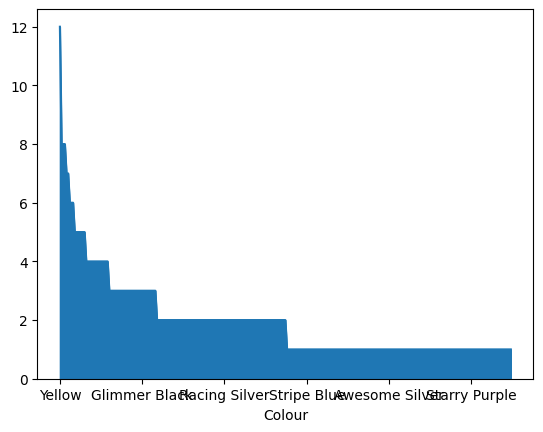

In [ ]:
df['Colour'].value_counts().plot(kind='area')

In [ ]:
df.groupby(['Model','Colour'])['Price'].mean().sort_values(ascending=False).head(20)

Model                       Colour            
APPLE iPhone 14 Plus        Midnight              80999.0
                            Purple                80999.0
                            Starlight             80999.0
SAMSUNG Galaxy S23 5G       Cream                 79999.0
Google Pixel 7              Lemongrass            55999.0
                            Obsidian              55999.0
                            Snow                  55999.0
APPLE iPhone 12             Blue                  53999.0
SAMSUNG Galaxy S22 Plus 5G  Phantom Black         49999.0
MOTOROLA Edge 30 Ultra      Interstellar Black    49999.0
                            Starlight White       49999.0
SAMSUNG Galaxy Z Flip3 5G   Phantom Black         44999.0
Google Pixel 7a             Charcoal              43999.0
                            Sea                   43999.0
                            Snow                  43999.0
APPLE iPhone 11             Black                 41199.0
SAMSUNG Galaxy A54 5G       Awesome Violet        40999.0
                            Awesome Graphite      40999.0
                            Awesome Lime          38999.0
OnePlus 8                   Interstellar Glow     38920.0
Name: Price, dtype: float64

In [ ]:
df["RAM"].value_counts()

,count
RAM,
4,186
8,157
6,121
3,40
2,37


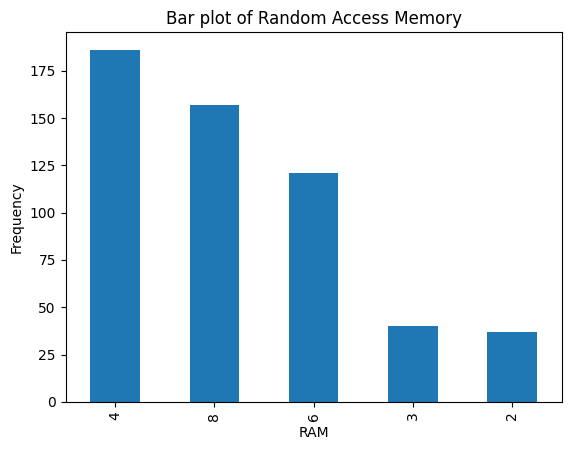

In [ ]:
df["RAM"].value_counts().plot(kind="bar")
plt.title("Bar plot of Random Access Memory")
plt.xlabel("RAM")
plt.ylabel("Frequency")
plt.show()

As per above  plot 4 GB RAM Mobiles are maximum 186 out of 541 mobiles of dataset.

In [ ]:
df["Memory"].value_counts()

,count
Memory,
128,259
64,169
256,55
32,52
16,6


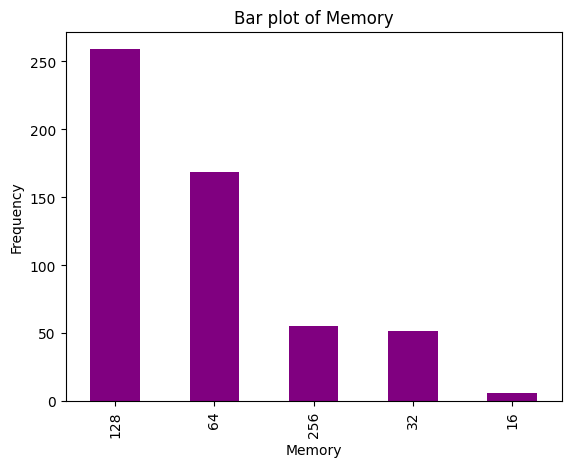

In [ ]:
df["Memory"].value_counts().plot(kind="bar",color="purple")
plt.title("Bar plot of Memory")
plt.xlabel("Memory")
plt.ylabel("Frequency")
plt.show()

In [ ]:
# 128 GB Mobiles are maximum 259 out of 541 mobiles.

In [ ]:
df["Model"].value_counts(ascending=False)

,count
Model,
vivo Y16,9
realme C55,9
SAMSUNG Galaxy A14 5G,9
REDMI Note 12 Pro 5G,9
vivo T1 44W,8
...,...
vivo Y1s,1
OnePlus Nord,1
Micromax 3,1


In [ ]:
# As per the above value count we can say that vivo Y 16 ,Realme C55,Samsung galaxy A51 5G,Redmi Note 12 Pro 5G ,Vivo T1 44W  MODELS having most count.

<Axes: ylabel='count'>

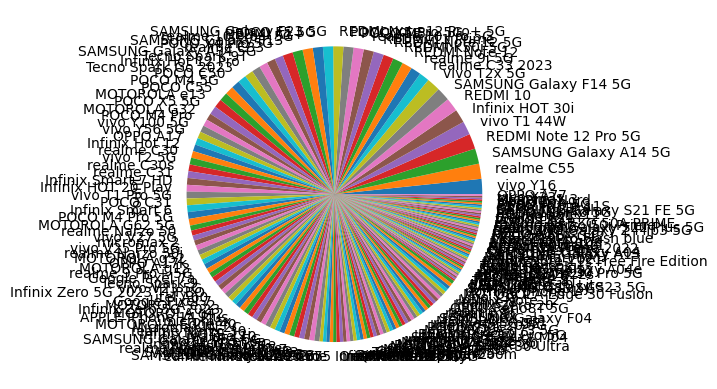

In [ ]:
df["Model"].value_counts().plot(kind ='pie',color='orange')

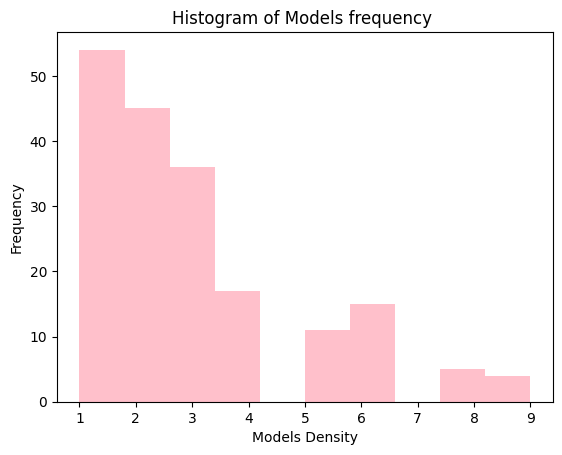

In [ ]:
df["Model"].value_counts().plot(kind ='hist',color='pink')
plt.title("Histogram of Models frequency ")
plt.xlabel("Models Density")
plt.ylabel("Frequency")
plt.show()

<Axes: xlabel='Model'>

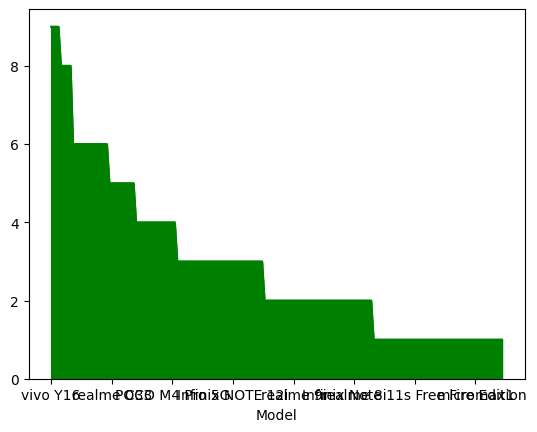

In [ ]:
df["Model"].value_counts().plot(kind ='area',color='green')

AI LENS : AI LENS CAM

Yes = Yes AI LENS CAM

NO = No AI LENS CAM

In [ ]:
df.rename(columns={'AI LENS':'AI LENS CAME'},inplace=True)

In [ ]:
df["AI Lens"]=df['AI Lens'].replace({'No':'No AI LENS CAM','Yes':'Yes AI LENS CAM'})

In [ ]:
df["AI Lens"].value_counts()

,count
AI Lens,
0,507
1,34


<Axes: xlabel='AI Lens'>

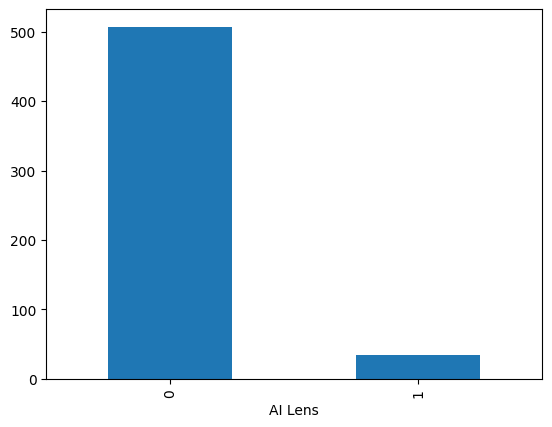

In [ ]:
df["AI Lens"].value_counts().plot(kind='bar')

In [ ]:
# according to above plot we can see the differnce of zero values is approx 500 .This feature is not very relevant to data we can drop that column.


In [ ]:
df1=df.drop(['AI Lens'], axis=1)
df1.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Price
0,Infinix SMART 7,Night Black,64,4,6000,13MP,5MP,16.76,Unisoc Spreadtrum SC9863A1,7299
1,Infinix SMART 7,Azure Blue,64,4,6000,13MP,5MP,16.76,Unisoc Spreadtrum SC9863A1,7299
2,MOTOROLA G32,Mineral Gray,128,8,5000,50MP,16MP,16.64,Qualcomm Snapdragon 680,11999
3,POCO C50,Royal Blue,32,2,5000,8MP,5MP,16.56,Mediatek Helio A22,5649
4,Infinix HOT 30i,Marigold,128,8,5000,50MP,5MP,16.76,G37,8999


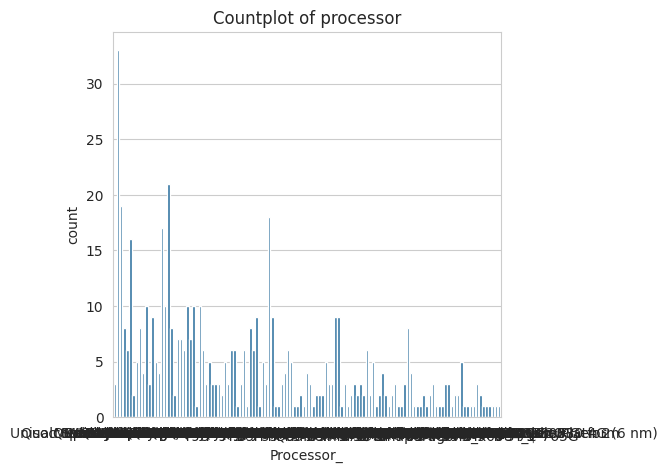

In [ ]:
plt.figure(figsize=(5,5))
sns.set_style("whitegrid")
sns.countplot(data=df1,x="Processor_")
plt.title("Countplot of processor")
plt.show()

In [ ]:
df1["Processor_"].value_counts()

,count
Processor_,
Qualcomm Snapdragon 680,33
Unisoc T612,21
Mediatek Helio A22,19
Mediatek Dimensity 1080,18
Qualcomm Snapdragon 695 5G,17
...,...
Qualcomm Snapdragon 439,1
Snapdragon 680,1
snapdragon 888,1


In [ ]:
# As per above count Qualcomm Snapdragon 680 type processor having  33 Mobiles and Unisoc T612 having 21  in all dataset.

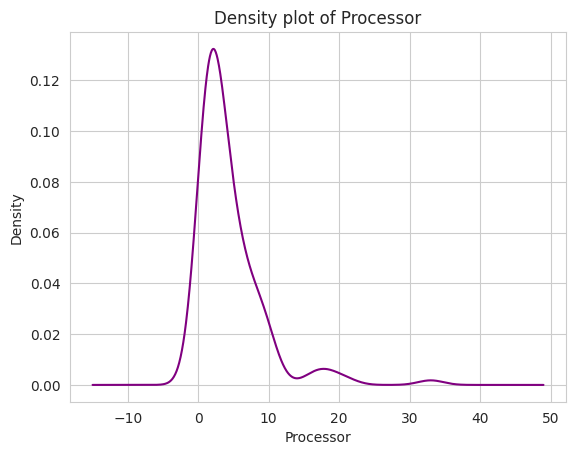

In [ ]:
df1["Processor_"].value_counts().plot(kind="density",color='purple')
plt.title("Density plot of Processor")
plt.xlabel("Processor")
plt.ylabel("Density")
plt.show()


In [ ]:
df1['Mobile Height'].value_counts()


,count
Mobile Height,
16.76,126
16.51,64
16.94,53
17.02,36
16.71,34
16.56,22
16.36,21
16.66,20
16.64,20


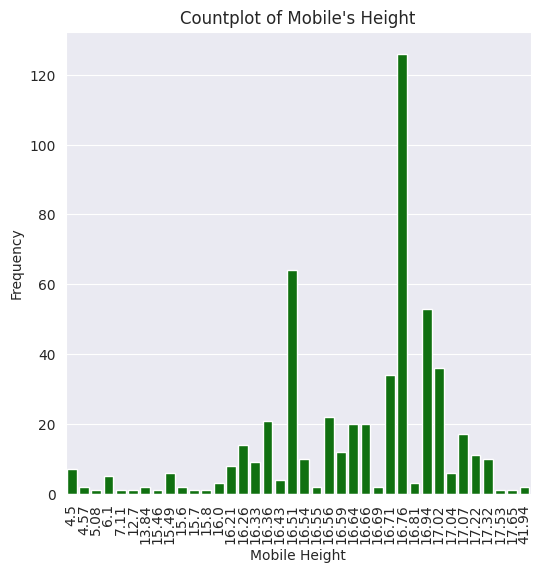

In [ ]:
plt.figure(figsize=(6,6))
sns.set_style('darkgrid')
sns.countplot(data=df1,x="Mobile Height",color='green')
plt.title("Countplot of Mobile's Height")
plt.xlabel("Mobile Height")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()

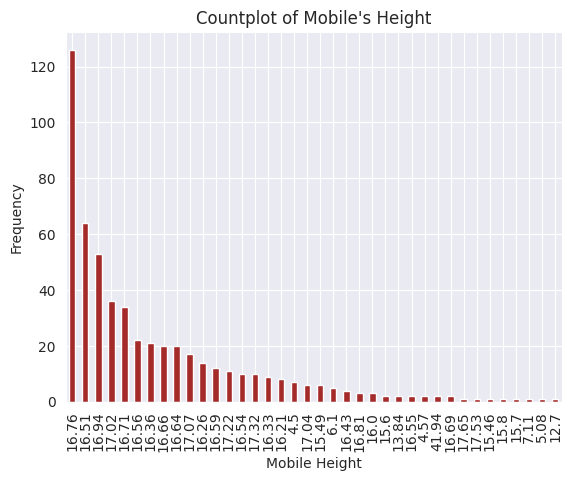

In [ ]:
df1['Mobile Height'].value_counts().plot(kind='bar',color='brown')
plt.title("Countplot of Mobile's Height")
plt.xlabel("Mobile Height")
plt.ylabel("Frequency")
plt.xticks(rotation=90)
plt.show()


In [ ]:
# As per above bar plot 16.76 height is mostly seen in all mobiles .

# TO CHECK OUTLIERS USING BOXPLOT

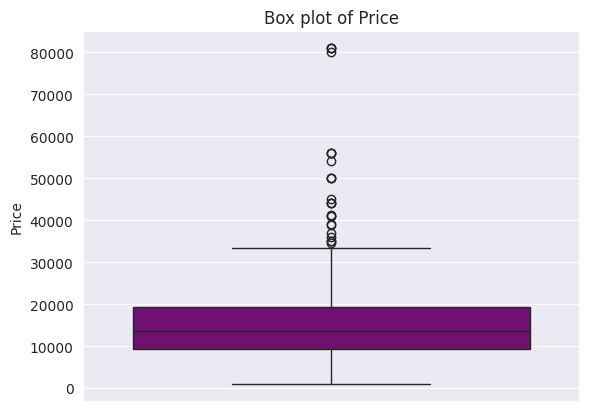

In [ ]:
sns.boxplot(data=df1,y="Price",color='purple')
plt.title('Box plot of Price')
plt.show()

In [ ]:
# IQR METHOD sale price  COLUMN.
q1 = df['Price'].quantile(.25)
q3 = df['Price'].quantile(.75)
iqr = q3-q1

In [ ]:
upper_limit = q3 +(1.5*iqr)
lower_limit = q1-(1.5*iqr)
upper_limit,lower_limit


(34265.0, -5695.0)

In [ ]:
Mobile_data=df1[(df1['Price'] <= upper_limit) & (df1['Price'] >= lower_limit)]
print('old data:',len(df1))
print('new data:',len(Mobile_data))
print('outliers:',len(df1)-len(Mobile_data))

old data: 541
new data: 516
outliers: 25


In [ ]:
# Box plot of Sale price after handling outliers

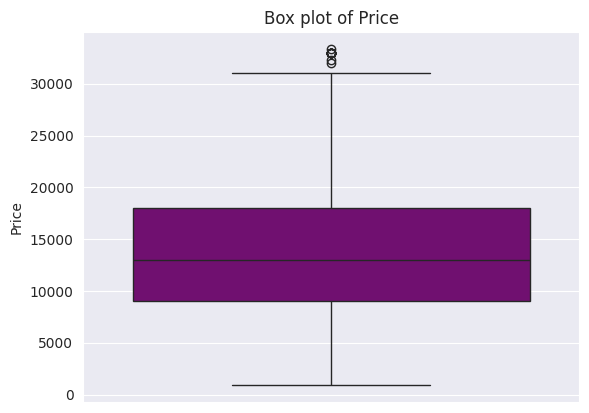

In [ ]:
sns.boxplot(data=Mobile_data,y="Price",color='purple')
plt.title('Box plot of Price')
plt.show()

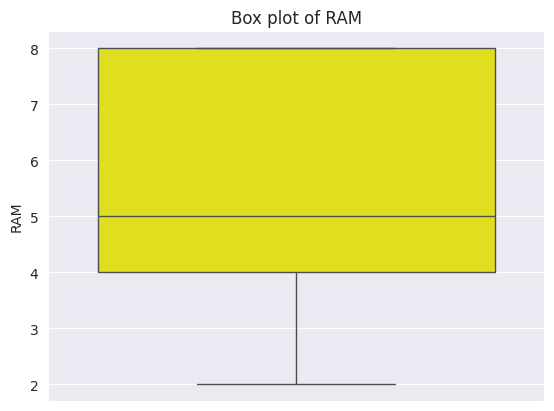

In [ ]:
sns.boxplot(data=Mobile_data,y="RAM",color='yellow')
plt.title('Box plot of RAM')
plt.show()

In [ ]:
# No outliers in RAM

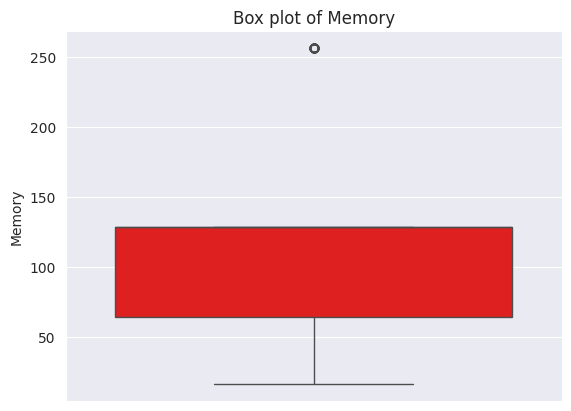

In [ ]:
sns.boxplot(data=Mobile_data,y="Memory",color='red')
plt.title('Box plot of Memory')
plt.show()

In [ ]:
# no outliers in Memory also.

In [ ]:
df_cat = Mobile_data.select_dtypes(np.object_)
df_num = Mobile_data.select_dtypes(np.number)

In [ ]:
df_cat.head()

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37


In [ ]:
df_num.head()

,Memory,RAM,Battery_,Mobile Height,Price
0,64,4,6000,16.76,7299
1,64,4,6000,16.76,7299
2,128,8,5000,16.64,11999
3,32,2,5000,16.56,5649
4,128,8,5000,16.76,8999


<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

<Figure size 600x600 with 0 Axes>

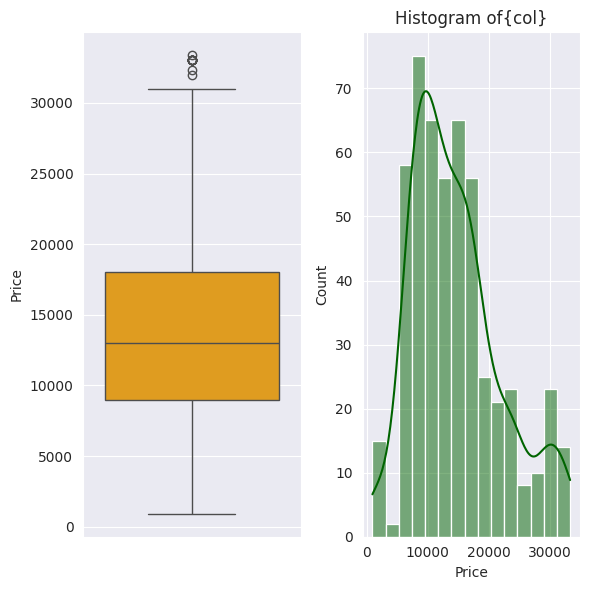

In [ ]:
for col in df_num:
   plt.figure(figsize=(6,6))
# Boxplot
plt.subplot(1,2,1)
sns.boxplot(y=Mobile_data[col],color='orange')

# Histogram
plt.subplot(1,2,2)
sns.histplot(Mobile_data[col],kde=True,color='darkgreen')
plt.title("Histogram of{col}")

plt.tight_layout()
plt.show()

 As per above representaion of Price through Box and histogram plot maximum purchase is shown between 10000 to 30000 price  mobile phones.  

 Bivariate Analysis

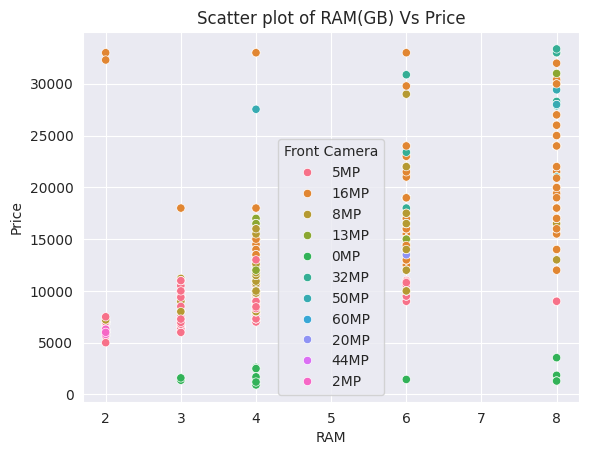

In [ ]:
sns.scatterplot(data=Mobile_data,x='RAM',y='Price',hue='Front Camera')
plt.title('Scatter plot of RAM(GB) Vs Price')
plt.show()

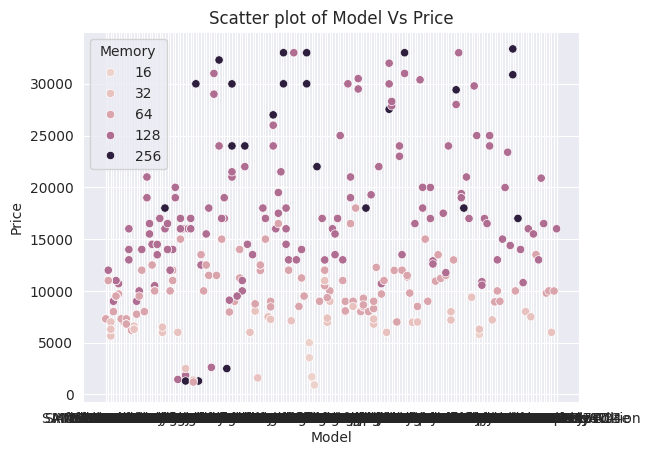

In [ ]:
sns.scatterplot(data=Mobile_data,x='Model',y='Price',color='brown',hue='Memory')
plt.title('Scatter plot of Model Vs Price')
plt.show()

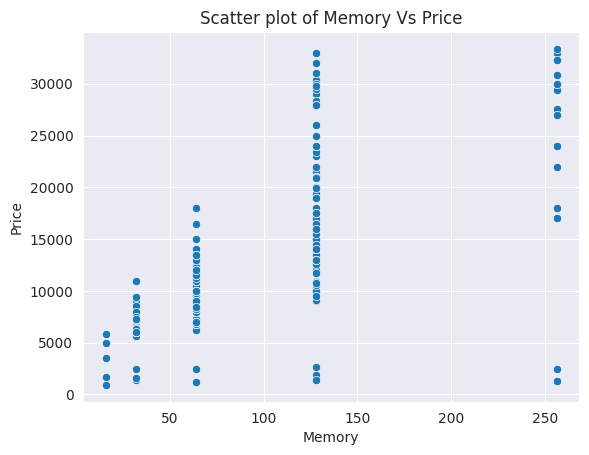

In [ ]:
sns.scatterplot(data=Mobile_data,x='Memory',y='Price')
plt.title('Scatter plot of Memory Vs Price')
plt.show()

 As per above plot maximum 250 GB Memory phones available in between 18k to 35k prices.

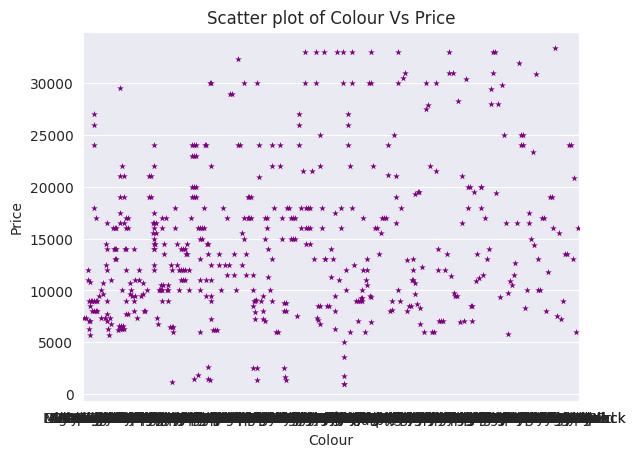

In [ ]:
sns.swarmplot(data=Mobile_data,x='Colour',y='Price',color='purple',marker='*')
plt.title('Scatter plot of Colour Vs Price')
plt.show()

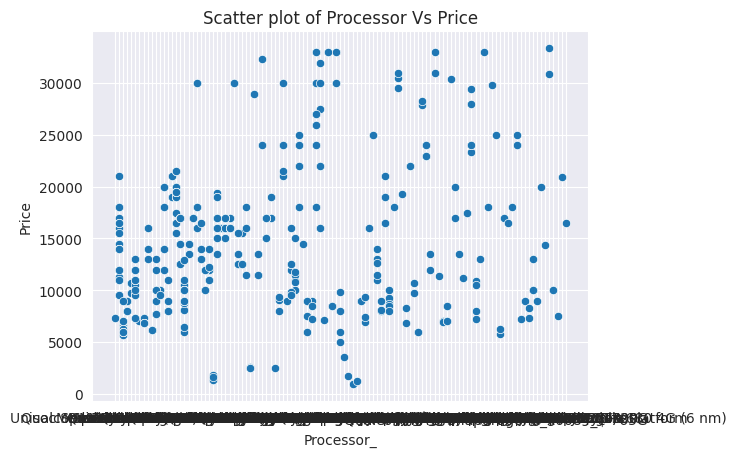

In [ ]:
sns.scatterplot(data=Mobile_data,x='Processor_',y='Price')
plt.title('Scatter plot of Processor Vs Price')
plt.show()


Multivariate Analysis

Text(0.5, 1.0, 'Pairplot of all the Featuers')

<Figure size 1000x1000 with 0 Axes>

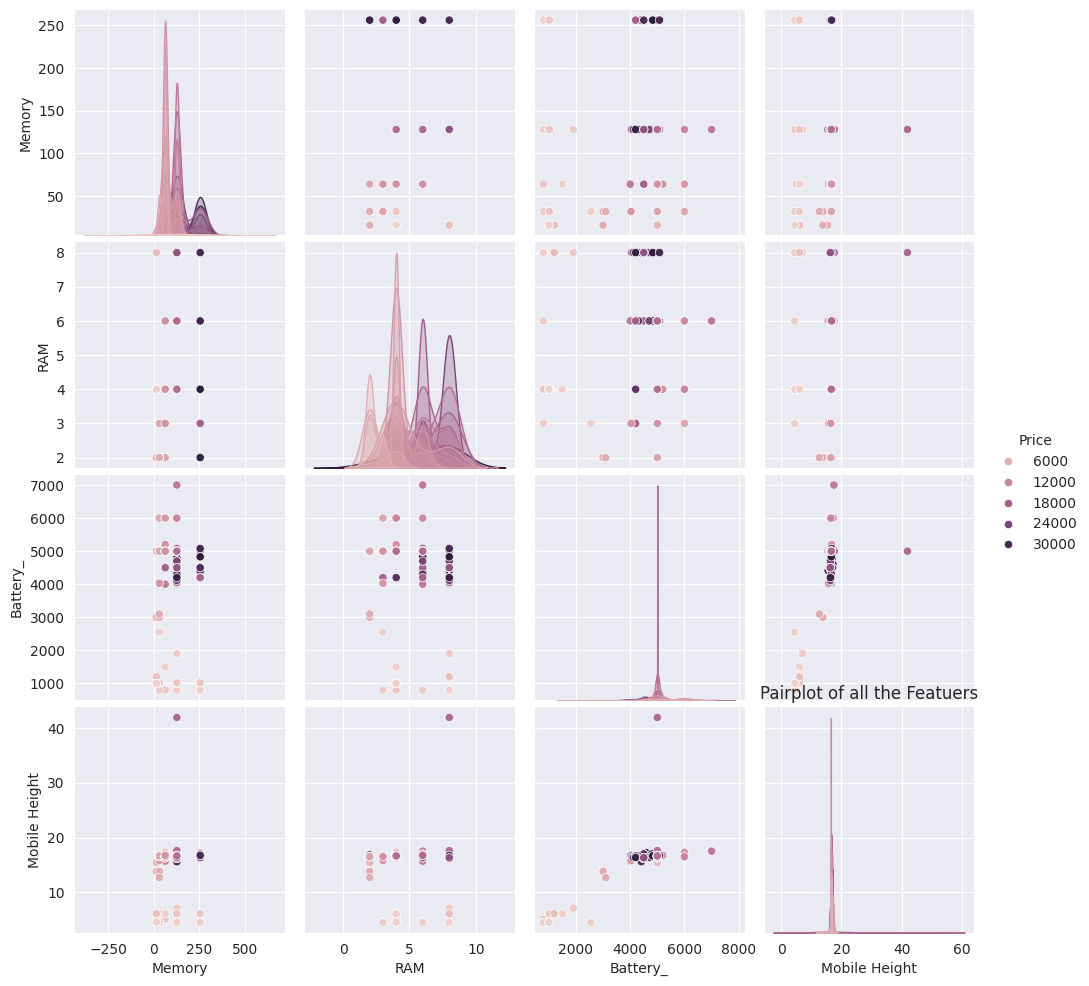

In [ ]:
plt.figure(figsize=(10,10))
sns.pairplot(data=Mobile_data,hue="Price")
plt.title("Pairplot of all the Featuers")


 Finding out the correlation between the features

In [ ]:
Mobile_data.shape

(516, 10)

In [ ]:
# Finding out the correlation between the features
corr = df_num.corr()
corr.shape

(5, 5)

First Understanding the heatmap of correlation between target and other features

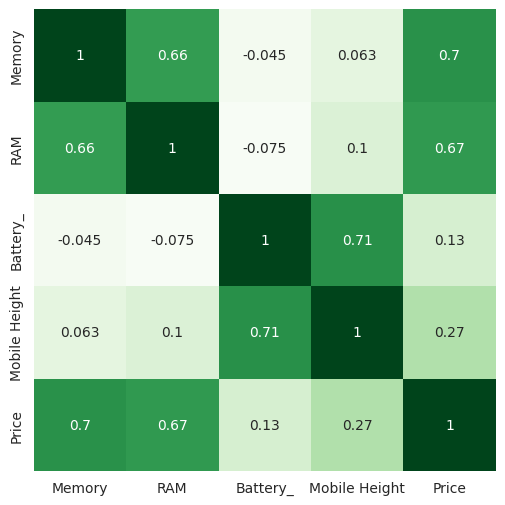

In [ ]:
# Plotting the heatmap of correlation between featuers

plt.figure(figsize=(6,6))
sns.heatmap(corr,cbar=False,square = True,annot=True, cmap = "Greens")
plt.show()

According to correlation of data price,memory,mobile height are higly correlated to each others.


<Axes: >

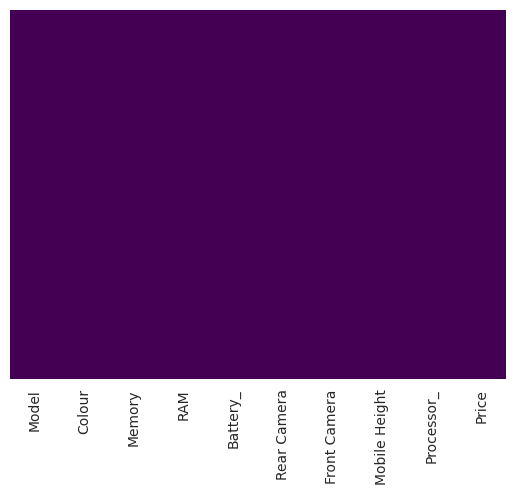

In [ ]:
# Checking the null values using heatmap
#  There is any null values are occupyed here

sns.heatmap(Mobile_data.isnull(),yticklabels= False,cbar=False,cmap="viridis")

In [ ]:
df_num.corr()

,Memory,RAM,Battery_,Mobile Height,Price
Memory,1.000000,0.656205,-0.045357,0.062689,0.703039
RAM,0.656205,1.000000,-0.074869,0.103705,0.672437
Battery_,-0.045357,-0.074869,1.000000,0.709361,0.128707
Mobile Height,0.062689,0.103705,0.709361,1.000000,0.271107
Price,0.703039,0.672437,0.128707,0.271107,1.000000


Here we can say that Memory,RAM,Mobile Height,Battery and price of mobile phones are positively correlated.

In [ ]:
df_num.skew()

,0
Memory,1.062375
RAM,0.116873
Battery_,-3.482041
Mobile Height,1.146618
Price,0.760982


 Here we can say that Memory,RAM,Mobile Height, and price of mobile phones are positively skewed as compare to Bttery it is highly negatively skewed

In [ ]:
df_cat

,Model,Colour,Rear Camera,Front Camera,Processor_
0,Infinix SMART 7,Night Black,13MP,5MP,Unisoc Spreadtrum SC9863A1
1,Infinix SMART 7,Azure Blue,13MP,5MP,Unisoc Spreadtrum SC9863A1
2,MOTOROLA G32,Mineral Gray,50MP,16MP,Qualcomm Snapdragon 680
3,POCO C50,Royal Blue,8MP,5MP,Mediatek Helio A22
4,Infinix HOT 30i,Marigold,50MP,5MP,G37
...,...,...,...,...,...
534,Nokia G11 Plus,Grey,50MP,8MP,Octa Core
535,SAMSUNG Galaxy A04e,Light Blue,13MP,5MP,Mediatek Helio P35
537,LAVA Z21,Cyan,5MP,2MP,Octa Core
538,Tecno Spark 8T,Turquoise Cyan,50MP,8MP,MediaTek Helio G35


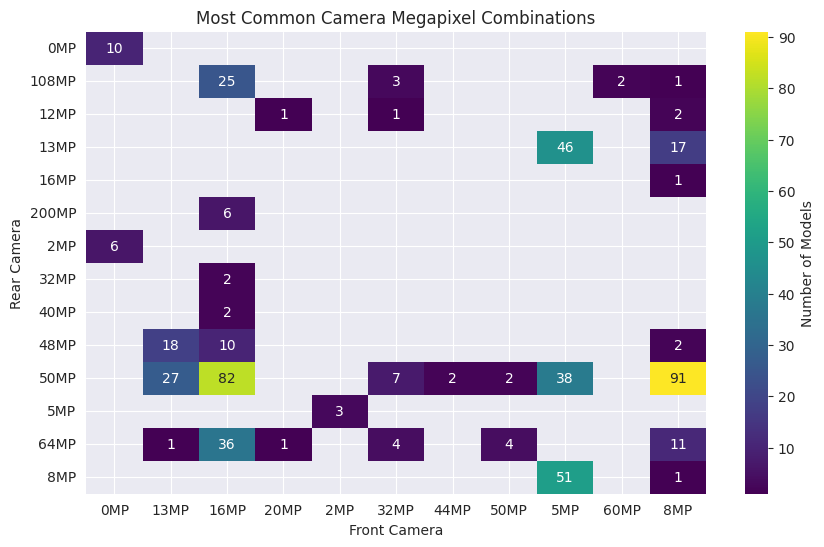

In [ ]:
# @title Most Common Camera Megapixel Combinations

import matplotlib.pyplot as plt
camera_combinations = df_cat.groupby(['Rear Camera', 'Front Camera']).size().unstack()
plt.figure(figsize=(10, 6))
sns.heatmap(camera_combinations, annot=True, fmt='.0f', cmap='viridis', cbar_kws={'label': 'Number of Models'})
plt.title('Most Common Camera Megapixel Combinations')
plt.xlabel('Front Camera')
_ = plt.ylabel('Rear Camera')

In [ ]:
# Most frequently shown rearcamera is 50MP AND Front camera is 16MP .

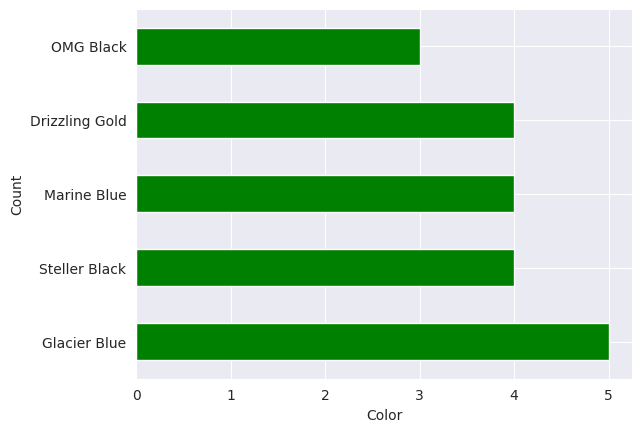

In [ ]:
# @title Top 5 Colors for Top 10 Phone Models

import matplotlib.pyplot as plt

top_10_models = df_cat['Model'].value_counts().head(10).index
df_cat[df_cat['Model'].isin(top_10_models)]['Colour'].value_counts().head(5).plot(kind='barh',color='green')
plt.xlabel('Color')
_ = plt.ylabel('Count')

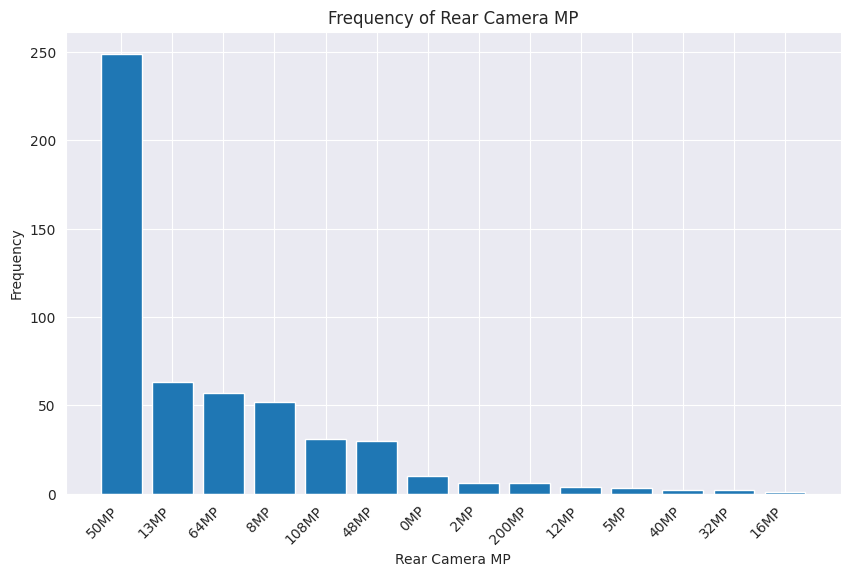

In [ ]:
# @title Frequency of Rear Camera MP

import matplotlib.pyplot as plt

# Assuming your dataframe is named df_cat
rear_camera_counts = df_cat['Rear Camera'].value_counts()

plt.figure(figsize=(10, 6))
plt.bar(rear_camera_counts.index, rear_camera_counts.values)
plt.xlabel('Rear Camera MP')
plt.ylabel('Frequency')
plt.title('Frequency of Rear Camera MP')
_ = plt.xticks(rotation=45, ha='right')

In [ ]:
# 50 Mega pixel Rear Camera is most frequently shown in our dataset.

In [ ]:
# to check unique values in categorical columns.
for column in df_cat:
    unique_values = Mobile_data[column].unique()
    print("unique values in'{columns}':")
    print(unique_values)
    print()

unique values in'{columns}':
['Infinix SMART 7' 'MOTOROLA G32' 'POCO C50' 'Infinix HOT 30i' 'REDMI 10'
 'SAMSUNG Galaxy F13' 'SAMSUNG Galaxy F04' 'POCO C51' 'MOTOROLA e13'
 'vivo T2x 5G' 'Infinix Smart 7 HD' 'REDMI A1+' 'POCO C55' 'MOTOROLA g13'
 'POCO M4 5G' 'MOTOROLA e32' 'vivo T2 5G' 'MOTOROLA G62 5G' 'POCO M5'
 'realme C33 2023' 'SAMSUNG Galaxy F14 5G' 'MOTOROLA g73 5G' 'realme C30'
 'POCO X5 5G' 'POCO M4 Pro' 'REDMI 11 Prime' 'realme C55'
 'realme 10 Pro 5G' 'Micromax IN 2C' 'POCO M4 Pro 5G'
 'realme Narzo 30 Pro 5G' 'micromax 2' 'Infinix Note 12 Pro 5G'
 'SAMSUNG Galaxy F23 5G' 'micromax' 'MOTOROLA Edge 40' 'micromax 1'
 'realme Narzo 30' 'Infinix NOTE 12i' 'realme 10' 'realme 8i' 'Micromax 3'
 'Google Pixel 6a' 'Infinix HOT 20 5G' 'realme GT 2' 'REDMI Note 12'
 'REDMI Note 12 5G' 'micromax 3' 'SAMSUNG Galaxy M04' 'REDMI K50i 5G'
 'MOTOROLA e40' 'REDMI 9 Activ' 'MOTOROLA g42' 'realme C25s'
 'POCO X5 Pro 5G' 'POCO M3 Pro 5G' 'Infinix Smart 6 HD'
 'Infinix Hot 20 5G' 'realme C31' '

In [ ]:
# to check unique values in numerical columns.
for column in df_num:
    unique_values = Mobile_data[column].unique()
    print("unique values in'{columns}':")
    print(unique_values)
    print()

unique values in'{columns}':
[ 64 128  32 256  16]

unique values in'{columns}':
[4 8 2 6 3]

unique values in'{columns}':
[6000 5000 4500  800 1900 1000 4400 1020 4410 5080 2550 4980 4600 1200
 1500 4020 4800 4200 4050 4000 4030 4300 4115 3000 4700 5020 4830 5200
 7000 3100]

unique values in'{columns}':
[16.76 16.64 16.56 17.02 16.51 16.71 17.04 16.21 16.94 16.33 41.94 17.07
  4.5   7.11 16.26  6.1  15.6  16.81  5.08 16.59 16.43 16.66 17.22 16.36
 17.32 15.46  4.57 16.54 15.7  16.69 15.8  13.84 17.53 16.55 17.65 12.7 ]

unique values in'{columns}':
[ 7299 11999  5649  8999  7999  9499 10699  6999 15999 13999 12999  6199
  6599  7749  9699  9999 10999 20999 15499 18999 12499 10499 14490 16999
  6499  5999  6299 16499 14499 13490 19999  1449  1849  1422 29999  1299
 17999 11499  2615 28999 23999 14999  2490  7961  2499 11248  6799 13499
  8749  8049  1375  1599  7499  7245 26999 21999 17499 21499  7115 32999
  8499 25999  4999  3549  1699   920 11970  1199 12990  6978  7370  8995
 2499

# Handling Categorical Featuers(df_cat) , Using Label Encoder

In [ ]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Initialize LabelEncoder
label_encoder = LabelEncoder()
label_encoder
for column in df_cat:
   Mobile_data[column] = label_encoder.fit_transform(Mobile_data[column])



# Column to encode of the data
#col_to_encode = ['Model',"Colour","Rear Camera","Front Camera","Processor_"]

#Mobile_data[col_to_encode]=Mobile_data[col_to_encode].apply(lambda column:label_encoder.fit_transform(column))
#Mobile_data



In [ ]:
Mobile_data.head()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Price
0,18,152,64,4,6000,3,8,16.76,102,7299
1,18,19,64,4,6000,3,8,16.76,102,7299
2,30,142,128,8,5000,10,2,16.64,70,11999
3,62,192,32,2,5000,13,8,16.56,51,5649
4,7,124,128,8,5000,10,8,16.76,11,8999


<Axes: >

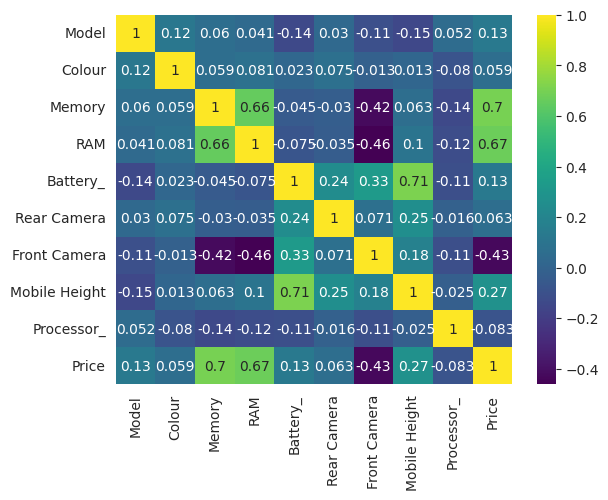

In [ ]:
sns.heatmap(Mobile_data.corr(),annot = True,cmap='viridis')

comment for correlation

In [ ]:
Mobile_data.corr()

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Price
Model,1.000000,0.115853,0.060136,0.040513,-0.137861,0.029971,-0.107393,-0.145113,0.052154,0.130788
Colour,0.115853,1.000000,0.058622,0.080880,0.023437,0.074812,-0.013406,0.012864,-0.079807,0.058620
Memory,0.060136,0.058622,1.000000,0.656205,-0.045357,-0.029650,-0.423266,0.062689,-0.140070,0.703039
RAM,0.040513,0.080880,0.656205,1.000000,-0.074869,-0.035356,-0.461455,0.103705,-0.121036,0.672437
Battery_,-0.137861,0.023437,-0.045357,-0.074869,1.000000,0.242221,0.327149,0.709361,-0.110126,0.128707
Rear Camera,0.029971,0.074812,-0.029650,-0.035356,0.242221,1.000000,0.071387,0.252303,-0.015715,0.062845
Front Camera,-0.107393,-0.013406,-0.423266,-0.461455,0.327149,0.071387,1.000000,0.176455,-0.111903,-0.427939
Mobile Height,-0.145113,0.012864,0.062689,0.103705,0.709361,0.252303,0.176455,1.000000,-0.025091,0.271107
Processor_,0.052154,-0.079807,-0.140070,-0.121036,-0.110126,-0.015715,-0.111903,-0.025091,1.000000,-0.083170
Price,0.130788,0.058620,0.703039,0.672437,0.128707,0.062845,-0.427939,0.271107,-0.083170,1.000000


In [ ]:
Mobile_data.corr(method='pearson')

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_,Price
Model,1.000000,0.115853,0.060136,0.040513,-0.137861,0.029971,-0.107393,-0.145113,0.052154,0.130788
Colour,0.115853,1.000000,0.058622,0.080880,0.023437,0.074812,-0.013406,0.012864,-0.079807,0.058620
Memory,0.060136,0.058622,1.000000,0.656205,-0.045357,-0.029650,-0.423266,0.062689,-0.140070,0.703039
RAM,0.040513,0.080880,0.656205,1.000000,-0.074869,-0.035356,-0.461455,0.103705,-0.121036,0.672437
Battery_,-0.137861,0.023437,-0.045357,-0.074869,1.000000,0.242221,0.327149,0.709361,-0.110126,0.128707
Rear Camera,0.029971,0.074812,-0.029650,-0.035356,0.242221,1.000000,0.071387,0.252303,-0.015715,0.062845
Front Camera,-0.107393,-0.013406,-0.423266,-0.461455,0.327149,0.071387,1.000000,0.176455,-0.111903,-0.427939
Mobile Height,-0.145113,0.012864,0.062689,0.103705,0.709361,0.252303,0.176455,1.000000,-0.025091,0.271107
Processor_,0.052154,-0.079807,-0.140070,-0.121036,-0.110126,-0.015715,-0.111903,-0.025091,1.000000,-0.083170
Price,0.130788,0.058620,0.703039,0.672437,0.128707,0.062845,-0.427939,0.271107,-0.083170,1.000000


In [ ]:
Mobile_data.corrwith(Mobile_data['Price'])

,0
Model,0.130788
Colour,0.058620
Memory,0.703039
RAM,0.672437
Battery_,0.128707
Rear Camera,0.062845
Front Camera,-0.427939
Mobile Height,0.271107
Processor_,-0.083170
Price,1.000000


# According to above correlation with 'PRICE' we can say that  Memory ,RAM, Mobile Height , Model ,Bttery ,Rear camer then Color are highly correlated to the price of Mobile Phones and Processor,Front Camera are highly negatively correlated to the prices.






# Featuer Selection
# Lets try to understand which are important feature for this dataset

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [ ]:
X = Mobile_data.iloc[:,0:9] # Independent columns
y = Mobile_data.iloc[:,[-1]] # Y target column i.e price range

In [ ]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_
0,18,152,64,4,6000,3,8,16.76,102
1,18,19,64,4,6000,3,8,16.76,102
2,30,142,128,8,5000,10,2,16.64,70
3,62,192,32,2,5000,13,8,16.56,51
4,7,124,128,8,5000,10,8,16.76,11
...,...,...,...,...,...,...,...,...,...
534,48,93,64,4,5000,10,10,16.55,63
535,97,113,64,3,5000,3,8,16.51,60
537,27,49,32,2,3100,11,4,12.70,63
538,112,245,64,4,5000,10,10,16.76,30


In [ ]:
y

,Price
0,7299
1,7299
2,11999
3,5649
4,8999
...,...
534,9790
535,9999
537,5998
538,9990


# Values Assigning

In [ ]:
# Apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=chi2, k=4)
fit = bestfeatures.fit(X,y)

In [ ]:
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
# Concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score'] #naming the dataframe columns
featureScores

,Specs,Score
0,Model,6155.251262
1,Colour,6633.326935
2,Memory,12883.887178
3,RAM,285.932465
4,Battery_,57961.594770
5,Rear Camera,462.997357
6,Front Camera,785.809200
7,Mobile Height,143.548664
8,Processor_,4106.845011


In [ ]:
print(featureScores.nlargest(4,'Score')) #print 4 best features

      Specs         Score
4  Battery_  57961.594770
2    Memory  12883.887178
1    Colour   6633.326935
0     Model   6155.251262


# Feature Importance


In [ ]:
from sklearn.ensemble import ExtraTreesRegressor
import matplotlib.pyplot as plt
model = ExtraTreesRegressor()
model.fit(X,y)

ExtraTreesRegressor()

[0.04449361 0.01056605 0.31349446 0.23737526 0.11168166 0.02558161
 0.12349092 0.09274869 0.04056774]


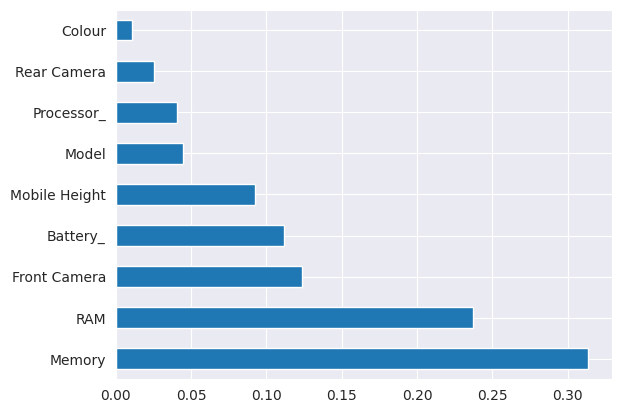

In [ ]:
print(model.feature_importances_) # use inbuilt class feature_importances of tree based Regressor
[0.12253721, 0.109504, 0.26739755, 0.09270551, 0.20932722 ,0.19852852]
# Plot graph of feature importances for better visualization
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()

In [ ]:
def find_skewness(Mobile_data):
  # select only numeric columns
  numeric_columns=Mobile_data.select_dtypes(include=['number']).columns
  # Calculate skewness for each column
  skewness = Mobile_data[numeric_columns].skew()
  return skewness

In [ ]:
find_skewness(Mobile_data)

,0
Model,-0.118978
Colour,0.055348
Memory,1.062375
RAM,0.116873
Battery_,-3.482041
Rear Camera,-1.052533
Front Camera,-0.069888
Mobile Height,1.146618
Processor_,-0.024900
Price,0.760982


In [ ]:
Mobile_data.shape


(516, 10)

In [ ]:
#Mobile_data.hist(figsize=(15,15),color='purple',edgecolor='purple')
#plt.show()

In [ ]:
Mobile_data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 516 entries, 0 to 540
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Model          516 non-null    int64  
 1   Colour         516 non-null    int64  
 2   Memory         516 non-null    int64  
 3   RAM            516 non-null    int64  
 4   Battery_       516 non-null    int64  
 5   Rear Camera    516 non-null    int64  
 6   Front Camera   516 non-null    int64  
 7   Mobile Height  516 non-null    float64
 8   Processor_     516 non-null    int64  
 9   Price          516 non-null    int64  
dtypes: float64(1), int64(9)
memory usage: 44.3 KB


In [ ]:
Mobile_data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Model,516.0,90.718992,49.233903,0.0,51.00,92.00,132.2500,175.00
Colour,516.0,128.209302,74.624957,0.0,63.75,126.50,190.0000,260.00
Memory,516.0,107.968992,59.144968,16.0,64.00,128.00,128.0000,256.00
RAM,516.0,5.319767,1.964855,2.0,4.00,5.00,8.0000,8.00
Battery_,516.0,4898.207364,780.082852,800.0,5000.00,5000.00,5000.0000,7000.00
Rear Camera,516.0,8.684109,3.686109,0.0,9.00,10.00,10.0000,13.00
Front Camera,516.0,5.575581,3.651320,0.0,2.00,8.00,8.0000,10.00
Mobile Height,516.0,16.433760,2.580542,4.5,16.51,16.71,16.8425,41.94
Processor_,516.0,55.687984,29.560823,0.0,36.00,54.00,75.0000,110.00
Price,516.0,14590.631783,7292.518114,920.0,8999.00,12999.00,17999.0000,33367.00


In [ ]:
#from sklearn.preprocessing import StandardScaler
#std_scaler = StandardScaler()

#Mobile_data["Price"]=std_scaler.fit_transform(Mobile_data[['Price']])
#Mobile_data

In [ ]:
# Define the features or independent variable
#X = Mobile_data.drop(['Price'], axis=1)
# Define the label or dependent variable
#y = Mobile_data['Price']

#Model Fitting

In [ ]:
# Value Assigning
X = Mobile_data.iloc[:,0:9]
y = Mobile_data.iloc[:,[-1]]

In [ ]:
X

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_
0,18,152,64,4,6000,3,8,16.76,102
1,18,19,64,4,6000,3,8,16.76,102
2,30,142,128,8,5000,10,2,16.64,70
3,62,192,32,2,5000,13,8,16.56,51
4,7,124,128,8,5000,10,8,16.76,11
...,...,...,...,...,...,...,...,...,...
534,48,93,64,4,5000,10,10,16.55,63
535,97,113,64,3,5000,3,8,16.51,60
537,27,49,32,2,3100,11,4,12.70,63
538,112,245,64,4,5000,10,10,16.76,30


In [ ]:
y

,Price
0,7299
1,7299
2,11999
3,5649
4,8999
...,...
534,9790
535,9999
537,5998
538,9990


In [ ]:
# Split the data into train and test

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2,random_state=42)

In [ ]:
X_train

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_
335,25,171,256,8,5000,10,2,17.22,39
173,21,4,32,2,5000,13,8,16.76,51
273,30,142,64,4,5000,10,2,16.64,70
514,39,136,64,4,5000,10,1,16.26,54
182,121,116,32,3,800,0,0,4.50,89
...,...,...,...,...,...,...,...,...,...
71,136,61,32,3,5000,13,8,16.51,105
106,62,46,32,3,5000,13,8,16.56,51
271,9,245,64,4,6000,10,10,17.32,62
447,163,241,128,8,4500,12,7,16.36,46


In [ ]:
X_train.shape


(412, 9)

In [ ]:
y_train

,Price
335,17999
173,5999
273,10999
514,11999
182,1599
...,...
71,6499
106,6299
271,8999
447,27999


In [ ]:
y_train.shape

(412, 1)

In [ ]:
X_test

,Model,Colour,Memory,RAM,Battery_,Rear Camera,Front Camera,Mobile Height,Processor_
307,14,77,64,4,5000,10,2,17.02,35
519,115,151,32,3,5000,3,8,16.66,28
453,4,96,64,4,6000,3,10,17.32,104
153,107,53,64,4,5000,3,8,16.51,38
523,128,134,64,4,5000,9,2,16.51,44
...,...,...,...,...,...,...,...,...,...
167,127,212,128,6,5000,10,2,16.76,37
276,168,63,128,4,5000,3,8,16.54,60
530,96,41,128,4,5000,10,8,16.51,60
535,97,113,64,3,5000,3,8,16.51,60


In [ ]:
X_test.shape

(104, 9)

In [ ]:
y_test

,Price
307,10999
519,7280
453,8999
153,7961
523,13499
...,...
167,17999
276,12990
530,12999
535,9999


In [ ]:
y_test.shape

(104, 1)

# USING SUPERVISE ML REGRESSION ALGORITHMS FOR MODEL(MOBILE PRICE) PREDICTION AND PERFORMANCE
1. LINEAR REGRESSION
2. RANDOM FOREST REGRESSION
3. SUPPORT VECTOR MACHINE

In [ ]:
from sklearn.linear_model import LinearRegression

In [ ]:
lr = LinearRegression()
lr

LinearRegression()

In [ ]:
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
# predictions

y_pred = lr.predict(X_test)
y_pred

array([[10722.89849331],
       [ 7254.1688698 ],
       [ 9496.9022202 ],
       [10137.6616207 ],
       [12367.04904758],
       [ 5971.05263127],
       [17323.57215588],
       [ 8981.72860012],
       [10849.96577214],
       [17191.30141597],
       [15891.28306152],
       [10785.12125968],
       [ 8334.50955567],
       [13162.37966989],
       [11242.67155151],
       [ 7891.92531668],
       [ 9421.15092403],
       [ 7257.37057643],
       [21171.80605435],
       [16255.60982178],
       [19375.64088595],
       [26847.71386295],
       [ 7182.05683572],
       [10367.54309424],
       [ 6852.35195403],
       [18179.33320504],
       [ 6828.53044193],
       [20624.71138657],
       [26123.22762695],
       [18218.1144523 ],
       [ 1292.21120361],
       [25941.53821618],
       [21300.02920468],
       [ 8696.94948462],
       [17768.51923958],
       [21757.91589887],
       [11059.32132488],
       [12793.99517596],
       [ 5972.02945606],
       [14973.30674421],


In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)
print("Mean absolute Error",mae)


Mean absolute Error 2659.4480288437


In [ ]:
from sklearn.metrics import mean_squared_error
# calculate mse
mse = mean_squared_error(y_test ,y_pred)
print("Mean Squared Error",mse)


Mean Squared Error 16669030.607519489


In [ ]:
# Root Mean Squared Error

In [ ]:
mse = 166690
rsme = np.sqrt(mse)
rsme

408.27686684405717

In [ ]:
# R-squared(Coeficient of Determination)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# calculate mae
r2 = r2_score(y_test, y_pred)
print("r2 score value:", r2)

r2 score value: 0.6488705136787472


# Training and testing Score/Accuracy  of Linear Regression

In [ ]:
# Training Score
print('Training Accuracy',lr.score(X_train,y_train))
# Testing Score
print('Testing Accuracy',lr.score(X_test,y_test))

Training Accuracy 0.6453402057430773
Testing Accuracy 0.6488705136787472


# Model Fitting

 Random Forest Rreressor

In [ ]:
from sklearn.ensemble import RandomForestRegressor
ref = RandomForestRegressor()
ref.fit(X_train,y_train)

RandomForestRegressor()

In [ ]:
# predictions

y_pred = ref.predict(X_test)
y_pred

array([12874.44      ,  7981.85      ,  8818.2       ,  8061.68      ,
       12606.385     ,  6584.465     , 20940.59      ,  9802.925     ,
       11473.07      , 10980.73      , 17994.        , 10482.96      ,
        8269.92      , 11972.5       ,  9687.91      ,  8535.24      ,
        9493.16      ,  6720.94      , 19769.        , 16549.        ,
       16099.        , 30387.77      ,  6958.94      , 13359.48      ,
        6338.        , 17462.77      ,  6980.445     , 24119.        ,
       22113.91      , 25707.85      ,  1477.14      , 20379.        ,
       21426.76      ,  9012.32      , 16764.        , 28722.73      ,
       10496.82      , 12304.        ,  6584.555     , 15278.82      ,
       19459.        ,  7042.93      ,  3176.11      , 20911.28      ,
       15332.925     , 17778.28      , 14754.49      ,  8165.02      ,
       15673.04      , 18826.82      , 13820.45      , 30445.99      ,
        7604.25      , 10816.2       , 13275.345     ,  6891.12      ,
      

In [ ]:
# Model Performance
# For Random forest regressor

In [ ]:
from sklearn.metrics import mean_absolute_error
mae = mean_absolute_error(y_test,y_pred)*100
print("Mean absolute Error",mae)


Mean absolute Error 98894.45176282054


In [ ]:
from sklearn.metrics import mean_squared_error
# calculate mse
mse = mean_squared_error(y_test ,y_pred)*100
print("Mean Squared Error",mse)


Mean Squared Error 261591698.18760502


In [ ]:
# Root Mean Squared Error

In [ ]:
mse = 4.39175
rsme = np.sqrt(mse)
rsme

2.0956502570801265

In [ ]:
# R-squared(Coeficient of Determination)

In [ ]:
from sklearn.metrics import r2_score

In [ ]:
# calculate mae
r2 = r2_score(y_test, y_pred)
print("r2 score value:", r2)

r2 score value: 0.9448962805497023


In [ ]:
# Training Score
print("Training Accuracy:",ref.score(X_train,y_train)*100)
# Testing Score
print("Testing Accuracy:",ref.score(X_test,y_test)*100)


Training Accuracy: 98.9758157285013
Testing Accuracy: 94.48962805497023


In [ ]:
# Model Fitting with another Algorithm

Support Vector Machine

In [ ]:
from sklearn.svm import SVR
svr = SVR(kernel="rbf")
svr.fit(X,y)

SVR()

In [ ]:
# Model Performance
# For Support Vector Regressor

In [ ]:
print(r2_score(y_test,y_pred)*100)
print(mean_absolute_error(y_test,y_pred))
print(mean_squared_error(y_test,y_pred))
print (np.sqrt(mean_squared_error(y_test,y_pred)))

94.48962805497023
988.9445176282053
2615916.98187605
1617.3796653464053


In [ ]:
y_pred =svr.predict(X_train)

In [ ]:
# Training Score
print("Training Accuracy:",svr.score(X_train,y_train)*100)

Training Accuracy: -6.8309854334640985


In [ ]:
# Testing Score
print("Testing Accuracy:",svr.score(X_test,y_test)*100)

Testing Accuracy: -0.15013935867878025


In [ ]:
# Cross Validation

In [152]:
# create a list of ML Algorithms
models = []
models.append(('Linear Regression', LinearRegression())) # Changed)
models.append(('Random Forest Rrgressor',RandomForestRegressor())) # Changed
models.append(('Support Vector Regressor', SVR())) # Changed


# Evaluate each model
from sklearn.model_selection import cross_val_score,KFold
from sklearn.linear_model import LinearRegression # Added
from sklearn.ensemble import RandomForestRegressor # Added
from sklearn.svm import SVR # Added

for name,model in models:
  cv = KFold(n_splits=10,shuffle=True,random_state=1)
  score= cross_val_score(model,X,y,cv=cv,scoring = 'r2')
  print(f"{name} has an r2 score:{np.round(score.mean(),3)},and SD:{np.round(score.std(),4)}")
  print()





Linear Regression has an r2 score:0.597,and SD:0.0794

Random Forest Rrgressor has an r2 score:0.943,and SD:0.023

Support Vector Regressor has an r2 score:-0.047,and SD:0.0461



In [ ]:
# check for model performance on the test data
ref=RandomForestRegressor()
%time ref.fit(X_train,y_train)
y_pred=ref.predict(X_test)
print(f'r2 score : {np.round(r2_score(y_test,y_pred),4)*100}%')
print(f'MAE : {np.round (mean_absolute_error(y_test,y_pred))}')
print(f'MSE:{np.round(mean_squared_error(y_test,y_pred))}')
print(f'RMSE:{np.round(mean_squared_error(y_test,y_pred)**0.5)}')



CPU times: user 258 ms, sys: 0 ns, total: 258 ms
Wall time: 257 ms
r2 score : 94.31%
MAE : 973.0
MSE:2701393.0
RMSE:1644.0


# Upon fitting with the data ,the r2 score was 93.92% which was pretty good.
Checking out other metrics ,the mean absolute error 967.0 and the mse()02558478.0 where quite low , which was inded impressive.

# HYPERPARAMETER TUNING


In [ ]:
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestRegressor


In [ ]:
param_grid = {'n_estimators':[100,200,300],'max_depth':[10,20,None],'min_samples_split':[2,5,10],'min_samples_leaf':[1,2,4],'bootstrap':[True,False]}
ref = RandomForestRegressor(random_state=4)
grid_search = GridSearchCV(estimator=ref,param_grid=param_grid,cv=5,scoring='r2')
grid_search.fit(X_train,y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=4),
             param_grid={'bootstrap': [True, False],
                         'max_depth': [10, 20, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='r2')

As I  Have done this project and i have analyzed that according to my  evaluation Cross validation and hyper tuning and scores all are indicating that
RandomForestRegressor  is the best Model for testing.